# Using `gwent` to Generate Characteristic Strain Curves

Here we show examples of using the different classes in `gwent` for various detectors, both loading in from a file and generating with `gwent`, and binary black holes, both in the frequency and time domain.

First, we load important packages

In [1]:
import numpy as np

import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from matplotlib import cm

import astropy.constants as const
import astropy.units as u
from astropy.cosmology import z_at_value
from astropy.cosmology import WMAP9 as cosmo

import gwent
import gwent.detector as detector
import gwent.binary as binary

Setting matplotlib and plotting preferences

In [2]:
mpl.rcParams['figure.dpi'] = 300
mpl.rcParams['figure.figsize'] = [5,3]
mpl.rcParams['text.usetex'] = True
mpl.rc('font',**{'family':'serif','serif':['Times New Roman'],'size':14})

axissize = 6
labelsize = 8
legendsize = 10
colornorm = colors.Normalize(vmin=0.0, vmax=5.0)
linesize = 2

We need to get the file directories to load in the instrument files.

In [3]:
load_directory = gwent.__path__[0] + '/LoadFiles'

## Initialize different instruments

If loading a detector, the file should be frequency in the first column and either strain, effective strain noise spectral density, or amplitude spectral density in the second column.

For generating a detector, one must assign a value to each of the different instrument parameters (see the section on Declaring x and y variables and Sample Rates).


## Load ground instruments from files

#### aLIGO

In [4]:
Ground_T_obs = 4*u.yr

In [5]:
#aLIGO
aLIGO_filedirectory = load_directory + '/InstrumentFiles/aLIGO/StrainFiles/'
aLIGO_filename = 'aLIGODesign.txt'
aLIGO_filelocation = aLIGO_filedirectory + aLIGO_filename

aLIGO = detector.GroundBased('aLIGO',Ground_T_obs,load_location=aLIGO_filelocation,I_type='A')

#### Einstein Telescope

In [6]:
#Einstein Telescope
ET_filedirectory = load_directory + '/InstrumentFiles/EinsteinTelescope/StrainFiles/'
ET_filename = 'ET_B_data.txt'
ET_filelocation = ET_filedirectory + ET_filename

ET = detector.GroundBased('ET',Ground_T_obs,load_location=ET_filelocation,I_type='A')

### Plots of Ground Detectors

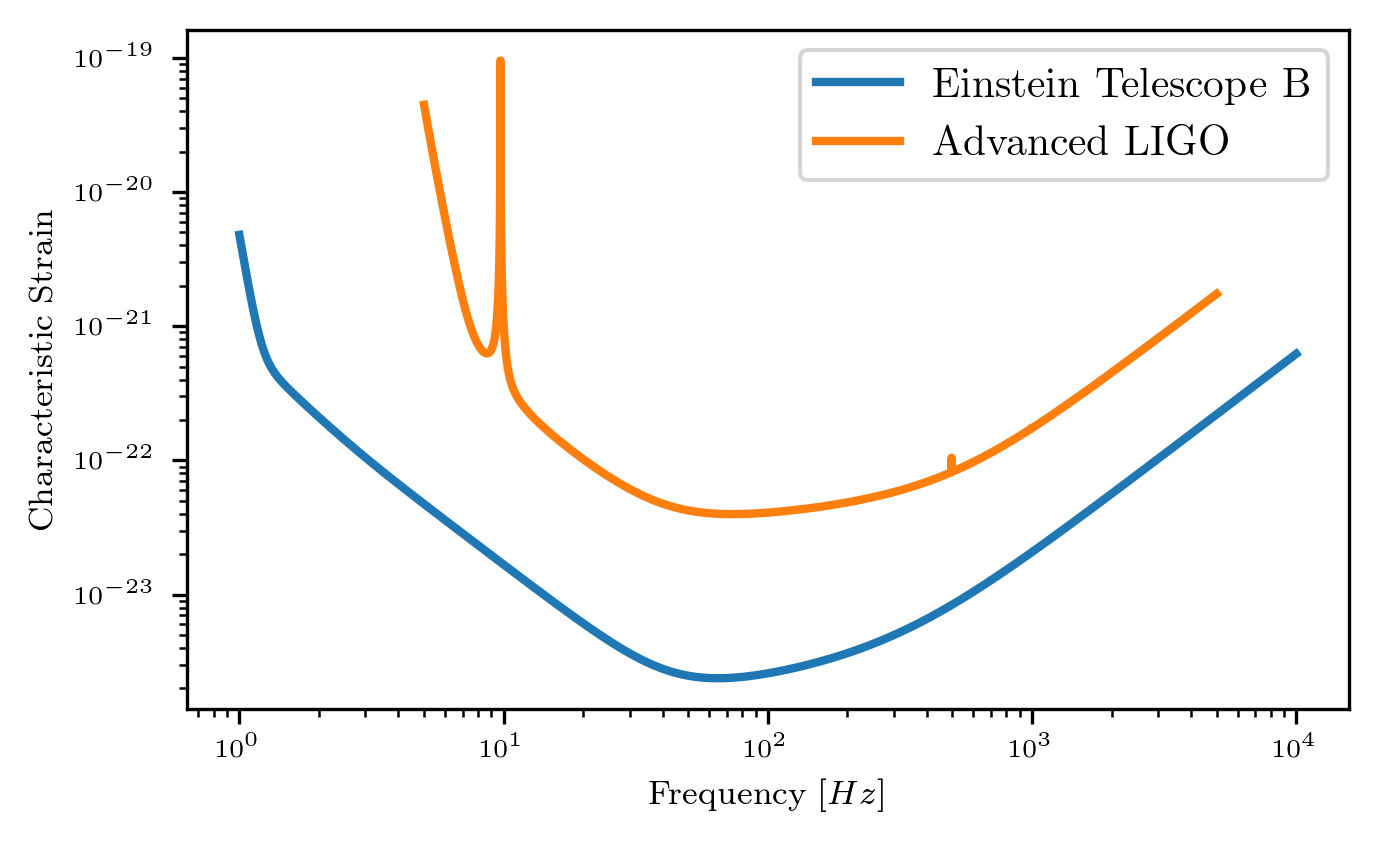

In [7]:
fig = plt.figure()
plt.loglog(ET.fT,ET.h_n_f,label='Einstein Telescope B', linewidth = linesize)
plt.loglog(aLIGO.fT,aLIGO.h_n_f,label='Advanced LIGO', linewidth = linesize)
plt.xlabel(r'Frequency $[Hz]$',fontsize = labelsize)
plt.ylabel(r'Characteristic Strain',fontsize = labelsize)
plt.tick_params(axis = 'both',which = 'major', labelsize = axissize)
plt.legend(fontsize = legendsize)
plt.show()

## Load LISA Instruments from File

#### LISA Example 1

Modelled off of the Science Requirements document from https://lisa.nasa.gov/documentsReference.html.

In [8]:
SpaceBased_T_obs = 4*u.yr

In [9]:
#Martin data
LISA_Other_filedirectory = load_directory + '/InstrumentFiles/LISA_Other/StrainFiles/'
LISA_ex1_filename = 'LISA_Allocation_S_h_tot.txt'
LISA_ex1_filelocation = LISA_Other_filedirectory + LISA_ex1_filename

#`I_type` should be Effective Noise Spectral Density
LISA_ex1 = detector.SpaceBased('LISA Example 1',SpaceBased_T_obs,load_location=LISA_ex1_filelocation,I_type='E')

#### LISA Example 2

Modelled off of Robson,Cornish,and Liu 2018, LISA (https://arxiv.org/abs/1803.01944).

In [10]:
#Neil Cornish data
LISA_ex2_filedirectory = load_directory + '/InstrumentFiles/LISA_Neil/StrainFiles/'
LISA_ex2_filename = 'LISA_sensitivity.txt'
LISA_ex2_filelocation = LISA_ex2_filedirectory + LISA_ex2_filename

#`I_type` should be Effective Noise Spectral Density
LISA_ex2 = detector.SpaceBased('LISA Example 2',SpaceBased_T_obs,load_location=LISA_ex2_filelocation,I_type='E')

#### LISA Example 3

Generated by http://www.srl.caltech.edu/~shane/sensitivity/

In [11]:
#Larson Sensitivity Curve
LISA_ex3_filename = 'scg_6981.dat'
LISA_ex3_filelocation = LISA_Other_filedirectory + LISA_ex3_filename

#`I_type` should be Amplitude Spectral Density
LISA_ex3 = detector.SpaceBased('LISA Example 3',SpaceBased_T_obs,load_location=LISA_ex3_filelocation,I_type='A')

### Plots of loaded LISA examples.

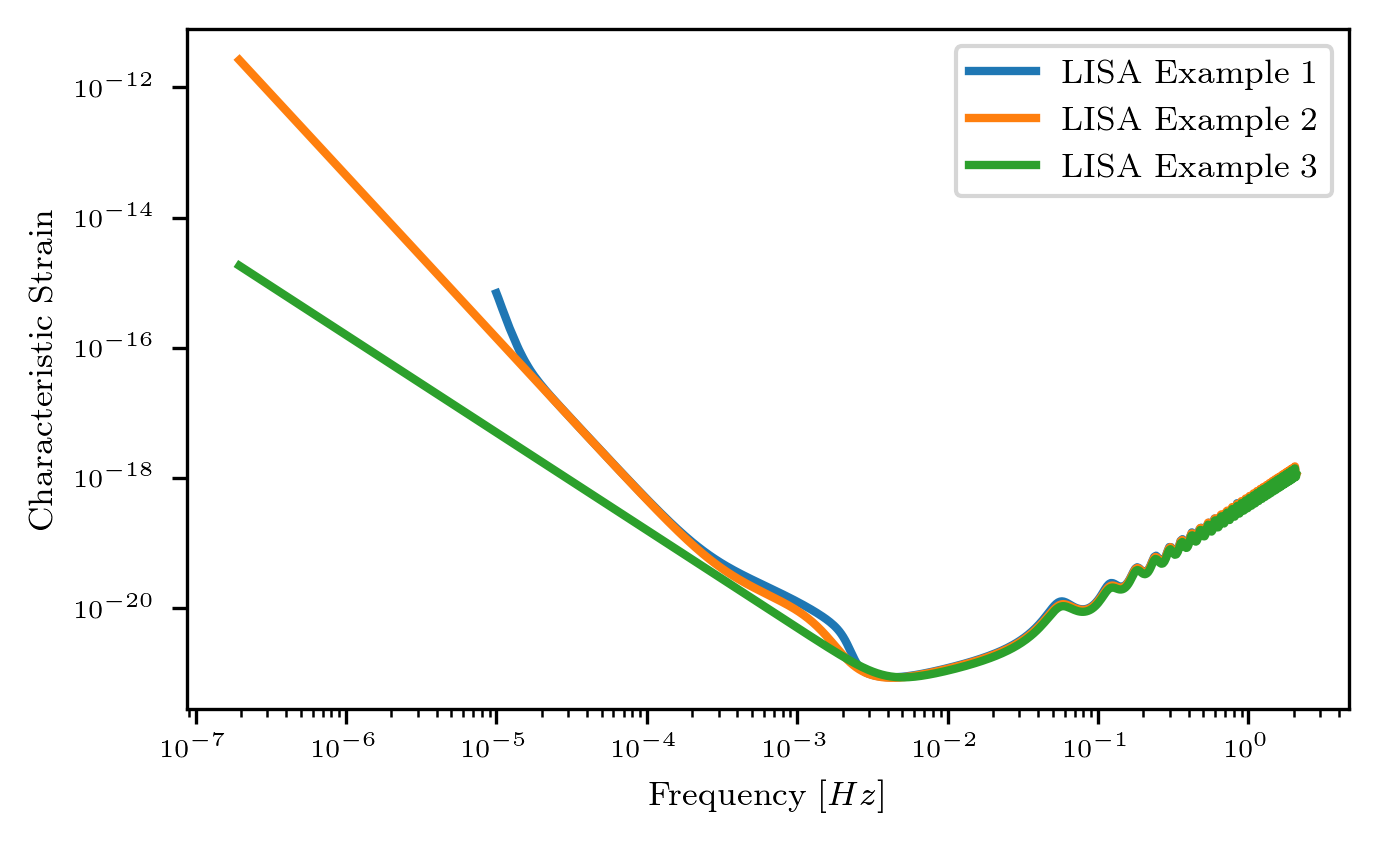

In [12]:
fig = plt.figure()
plt.loglog(LISA_ex1.fT,LISA_ex1.h_n_f,label=LISA_ex1.name,linewidth=linesize)
plt.loglog(LISA_ex2.fT,LISA_ex2.h_n_f,label=LISA_ex2.name,linewidth=linesize)
plt.loglog(LISA_ex3.fT,LISA_ex3.h_n_f,label=LISA_ex3.name,linewidth=linesize)
plt.xlabel(r'Frequency $[Hz]$',fontsize = labelsize)
plt.ylabel(r'Characteristic Strain',fontsize = labelsize)
plt.tick_params(axis = 'both',which = 'major', labelsize = axissize)
plt.legend(fontsize = labelsize)
plt.show()

## Loading PTA Detection Curves and Upper Limits

#### Simulated NANOGrav Continuous Wave Detection Sensitivity

Samples from Mingarelli, et al. 2017 (https://arxiv.org/abs/1708.03491) of the Simulated NANOGrav Continuous Wave Detection Sensitivity.

In [13]:
NANOGrav_filedirectory = load_directory + '/InstrumentFiles/NANOGrav/StrainFiles/' 

In [14]:
#NANOGrav continuous wave sensitivity
NANOGrav_background = 4e-16 # Unsubtracted GWB amplitude: 0,4e-16
NANOGrav_dp = 0.95 #Detection Probablility: 0.95,0.5
NANOGrav_fap = 0.0001 #False Alarm Probability: 0.05,0.003,0.001,0.0001
NANOGrav_Tobs = 15 #Observation years: 15,20,25

NANOGrav_filename = 'cw_simulation_Ared_' + str(NANOGrav_background) + '_dp_' + str(NANOGrav_dp) \
                    + '_fap_' + str(NANOGrav_fap) + '_T_' + str(NANOGrav_Tobs) + '.txt'
NANOGrav_filelocation = NANOGrav_filedirectory + NANOGrav_filename

NANOGrav_cw_no_GWB = detector.PTA('NANOGrav CW Detection no GWB',load_location=NANOGrav_filelocation)

In [15]:
#NANOGrav continuous wave sensitivity
NANOGrav_background_2 = 0 # Unsubtracted GWB amplitude: 0,4e-16
NANOGrav_dp_2 = 0.95 #Detection Probablility: 0.95,0.5
NANOGrav_fap_2 = 0.0001 #False Alarm Probability: 0.05,0.003,0.001,0.0001
NANOGrav_Tobs_2 = 15 #Observation years: 15,20,25

NANOGrav_filename_2 = 'cw_simulation_Ared_' + str(NANOGrav_background_2) + '_dp_' + str(NANOGrav_dp_2) \
                    + '_fap_' + str(NANOGrav_fap_2) + '_T_' + str(NANOGrav_Tobs_2) + '.txt'
NANOGrav_filelocation_2 = NANOGrav_filedirectory + NANOGrav_filename_2

NANOGrav_cw_GWB = detector.PTA('NANOGrav CW Detection no GWB',load_location=NANOGrav_filelocation_2)

#### NANOGrav Continuous Wave 11yr Upper Limit

Sample from Aggarwal, et al. 2019 (https://arxiv.org/abs/1812.11585) of the NANOGrav 11yr continuous wave upper limit.

In [16]:
NANOGrav_cw_ul_file = NANOGrav_filedirectory + 'smoothed_11yr.txt'
NANOGrav_cw_ul = detector.PTA('NANOGrav CW Upper Limit',load_location=NANOGrav_cw_ul_file)

### Plots of the loaded PTAs

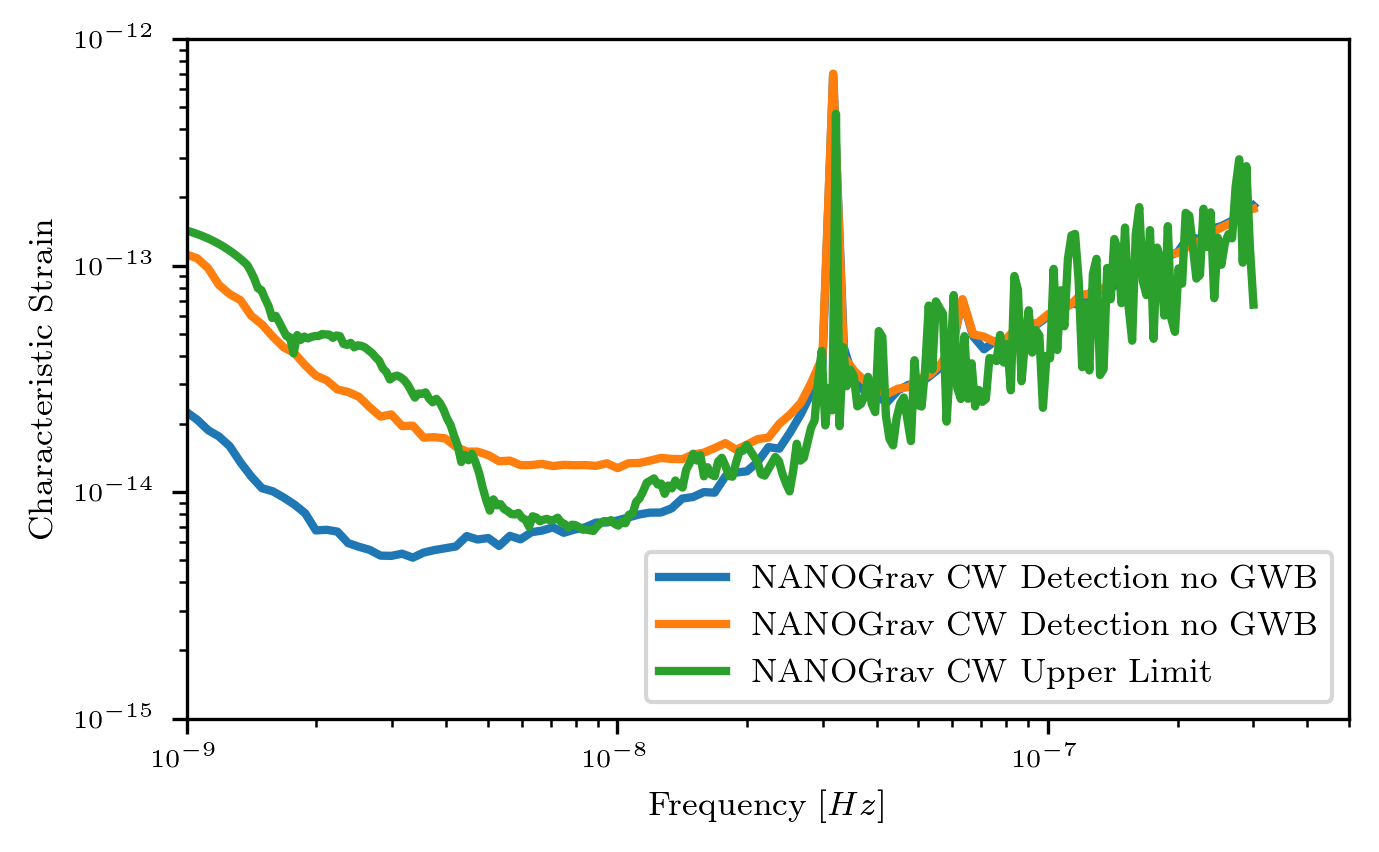

In [17]:
fig = plt.figure()
plt.loglog(NANOGrav_cw_GWB.fT,NANOGrav_cw_GWB.h_n_f, linewidth = linesize,\
           label = NANOGrav_cw_GWB.name)
plt.loglog(NANOGrav_cw_no_GWB.fT,NANOGrav_cw_no_GWB.h_n_f, linewidth = linesize,\
           label = NANOGrav_cw_no_GWB.name)
plt.loglog(NANOGrav_cw_ul.fT,NANOGrav_cw_ul.h_n_f, linewidth = linesize,\
           label = NANOGrav_cw_ul.name)

plt.tick_params(axis = 'both',which = 'major', labelsize = axissize)
plt.ylim([1e-15,1e-12])
plt.xlim([1e-9,5e-7])
plt.xlabel(r'Frequency $[Hz]$',fontsize = labelsize)
plt.ylabel('Characteristic Strain',fontsize = labelsize)
plt.legend(loc='lower right', fontsize = labelsize)
plt.show()

## Generating PTAs with `gwent`

Generated using the code `hasasia` (https://hasasia.readthedocs.io/en/latest/) via the methods of Hazboun, Romano, and Smith, 2019 (https://arxiv.org/abs/1907.04341)

#### SKA-esque Detector

Fiducial parameter estimates from Sesana, Vecchio, and Colacino, 2008 (https://arxiv.org/abs/0804.4476) section 7.1.

In [18]:
sigma_SKA = 10*u.ns.to('s')*u.s #sigma_rms timing residuals in nanoseconds to seconds
T_SKA = 15*u.yr #Observing time in years
N_p_SKA = 20 #Number of pulsars
cadence_SKA = 1/(u.wk.to('yr')*u.yr) #Avg observation cadence of 1 every week in [number/yr]

SKA with White noise only

In [19]:
SKA_WN = detector.PTA('SKA, WN Only',T_SKA,N_p_SKA,sigma_SKA,cadence_SKA)

SKA with White and Varied Red Noise

In [20]:
SKA_WN_RN = detector.PTA('SKA, WN and RN',T_SKA,N_p_SKA,sigma_SKA,cadence_SKA,A_rn=[1e-16,1e-12],alpha_rn=[-3/4,1])

SKA with White Noise and a Stochastic Gravitational Wave Background

In [21]:
SKA_WN_GWB = detector.PTA('SKA, WN and GWB',T_SKA,N_p_SKA,sigma_SKA,cadence_SKA,A_GWB=4e-16)

#### NANOGrav-esque Detector

Fiducial 11yr parameter estimates from Arzoumanian, et al., 2018 https://arxiv.org/abs/1801.01837

In [22]:
###############################################
#NANOGrav calculation using 11.5yr parameters https://arxiv.org/abs/1801.01837
sigma_nano = 100*u.ns.to('s')*u.s #rms timing residuals in nanoseconds to seconds
T_nano = 15*u.yr #Observing time in years
N_p_nano = 18 #Number of pulsars
cadence_nano = 1/(2*u.wk.to('yr')*u.yr) #Avg observation cadence of 1 every 2 weeks in number/year

NANOGrav with White Noise only

In [23]:
NANOGrav_WN = detector.PTA('NANOGrav, WN Only',T_nano,N_p_nano,sigma_nano,cadence_nano)

NANOGrav with White and Varied Red Noise

In [24]:
NANOGrav_WN_RN = detector.PTA('NANOGrav, WN and RN',T_nano,N_p_nano,sigma_nano,cadence_nano,A_rn=[1e-16,1e-12],alpha_rn=[-3/4,1])

NANOGrav with White Noise and a Stochastic Gravitational Wave Background

In [25]:
NANOGrav_WN_GWB = detector.PTA('NANOGrav, WN and GWB',T_nano,N_p_nano,sigma_nano,cadence_nano,A_GWB=4e-16)

### Plots for Simulated PTAs

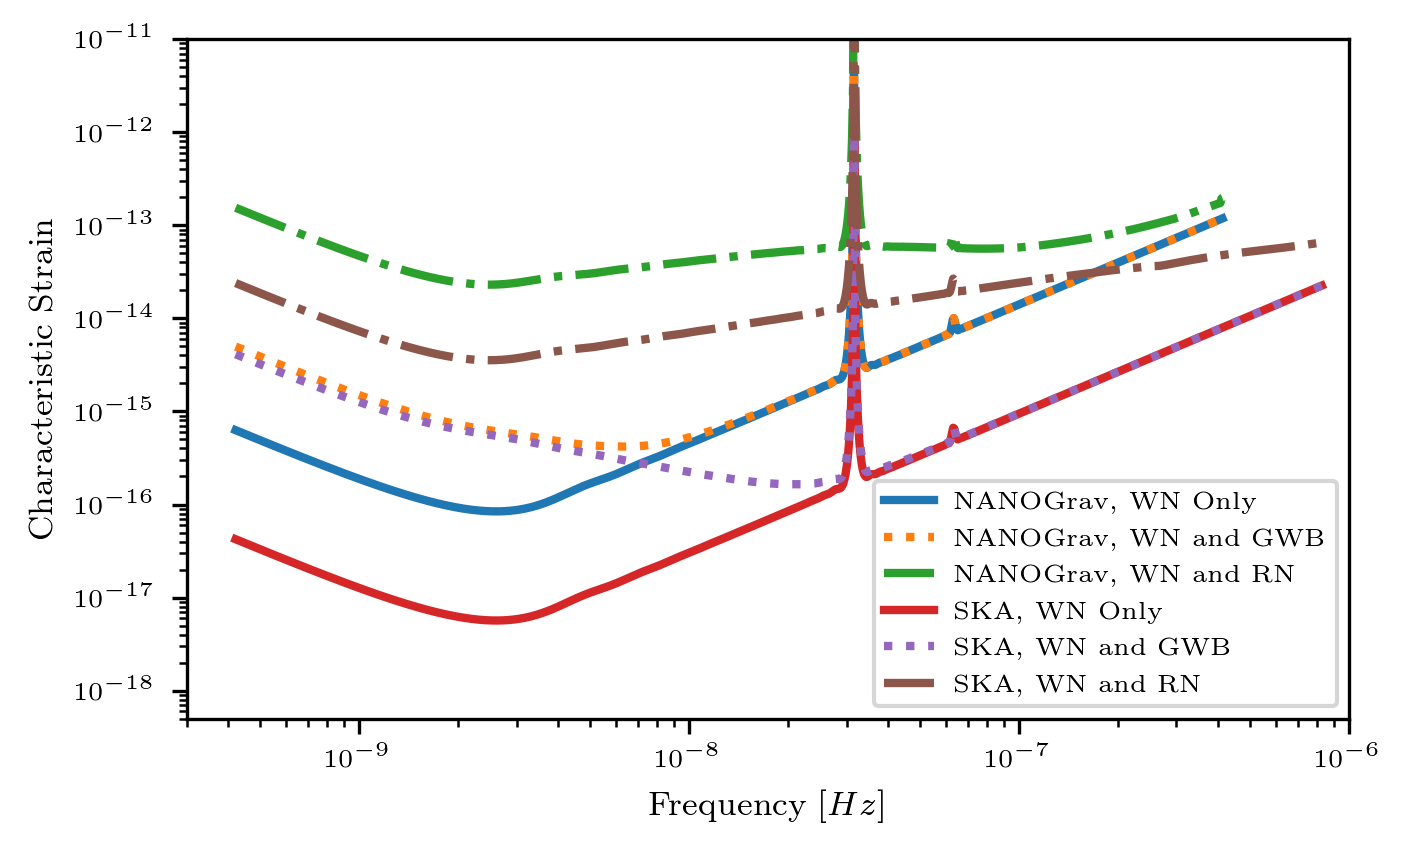

In [26]:
fig = plt.figure()
plt.loglog(NANOGrav_WN.fT,NANOGrav_WN.h_n_f,\
           linewidth=linesize,label=NANOGrav_WN.name)
plt.loglog(NANOGrav_WN_GWB.fT,NANOGrav_WN_GWB.h_n_f,\
           linewidth=linesize,linestyle=':',label=NANOGrav_WN_GWB.name)
plt.loglog(NANOGrav_WN_RN.fT,NANOGrav_WN_RN.h_n_f,\
           linewidth=linesize,linestyle='-.',label=NANOGrav_WN_RN.name)

plt.loglog(SKA_WN.fT,SKA_WN.h_n_f, linewidth = linesize,\
           label = SKA_WN.name)
plt.loglog(SKA_WN_GWB.fT,SKA_WN_GWB.h_n_f, linewidth = linesize,linestyle=':',\
           label = SKA_WN_GWB.name)
plt.loglog(SKA_WN_RN.fT,SKA_WN_RN.h_n_f, linewidth = linesize,linestyle='-.',\
           label = SKA_WN_RN.name)

plt.tick_params(axis = 'both',which = 'major', labelsize = axissize)
plt.ylim([5e-19,1e-11])
plt.xlim([3e-10,1e-6])

plt.xlabel(r'Frequency $[Hz]$',fontsize = labelsize)
plt.ylabel('Characteristic Strain',fontsize = labelsize)
plt.legend(loc='lower right', fontsize = legendsize-4)
plt.show()

## Generating LISA designs with `gwent`

First we set a fiducial armlength and observation time-length

In [27]:
L = 2.5*u.Gm  #armlength in Gm
L = L.to('m')
LISA_T_obs = 4*u.yr

#### LISA Proposal 1

Values taken from the ESA L3 proposal, Amaro-Seaone, et al., 2017 (https://arxiv.org/abs/1702.00786)

In [28]:
f_acc_break_low = .4*u.mHz.to('Hz')*u.Hz
f_acc_break_high = 8.*u.mHz.to('Hz')*u.Hz
f_IMS_break = 2.*u.mHz.to('Hz')*u.Hz
A_acc = 3e-15*u.m/u.s/u.s
A_IMS = 10e-12*u.m

Background = False

LISA_prop1 = detector.SpaceBased('LISA',\
                          LISA_T_obs,L,A_acc,f_acc_break_low,f_acc_break_high,A_IMS,f_IMS_break,\
                          Background=Background)

#### LISA Proposal 2

Values from Robson, Cornish, and Liu 2019 https://arxiv.org/abs/1803.01944 using the Transfer Function Approximation within.

In [29]:
f_acc_break_low = .4*u.mHz.to('Hz')*u.Hz
f_acc_break_high = 8.*u.mHz.to('Hz')*u.Hz
f_IMS_break = 2.*u.mHz.to('Hz')*u.Hz
A_acc = 3e-15*u.m/u.s/u.s
A_IMS = 1.5e-11*u.m
Background = False
    
LISA_prop2 = detector.SpaceBased('LISA Approximate',\
                           LISA_T_obs,L,A_acc,f_acc_break_low,f_acc_break_high,A_IMS,f_IMS_break,\
                           Background=Background)

### Plots of Generated LISA Detectors

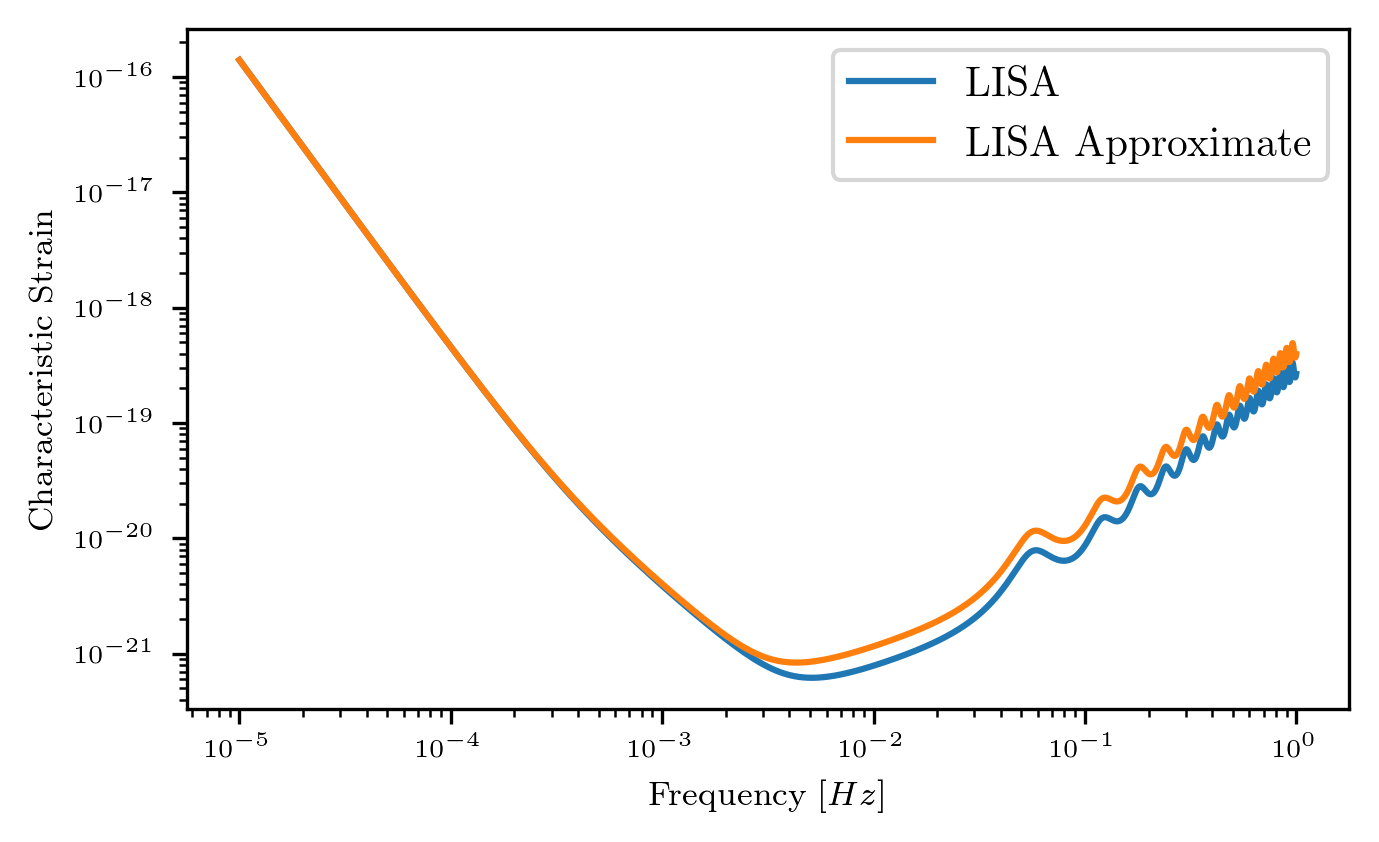

In [30]:
fig = plt.figure()
plt.loglog(LISA_prop1.fT,LISA_prop1.h_n_f,label=LISA_prop1.name)
plt.loglog(LISA_prop2.fT,LISA_prop2.h_n_f,label=LISA_prop2.name)
plt.xlabel(r'Frequency $[Hz]$',fontsize = labelsize)
plt.ylabel(r'Characteristic Strain',fontsize = labelsize)
plt.tick_params(axis = 'both',which = 'major', labelsize = axissize)
plt.legend(fontsize = legendsize)
plt.show()

## Generating Binary Black Holes with `gwent` in the Frequency Domain

We start with BBH parameters that exemplify the range of IMRPhenomD's waveforms from Khan, et al. 2016 https://arxiv.org/abs/1508.07253 and Husa, et al. 2016 https://arxiv.org/abs/1508.07250 

In [31]:
M = [1e6,65.0,1e10]
q = [1.0,18.0,1.0]
x1 = [0.95,0.0,-0.95]
x2 = [0.95,0.0,-0.95]
z = [3.0,0.093,20.0]
inc = 0.0 #Doesn't really work 

Uses the first parameter values and the `LISA_prop1` detector model for calculation of the monochromatic strain.

In [32]:
source_1 = binary.BBHFrequencyDomain(M[0],q[0],z[0],x1[0],x2[0],inc,instrument=LISA_prop1)

Uses the first parameter values and the `aLIGO` detector model for calculation of the monochromatic strain.

In [33]:
source_2 = binary.BBHFrequencyDomain(M[1],q[1],z[1],x1[1],x2[1],inc,instrument=aLIGO)

Uses the first parameter values and the `SKA_WN` detector model for calculation of the monochromatic strain.

In [34]:
source_3 = binary.BBHFrequencyDomain(M[2],q[2],z[2],x1[2],x2[2],inc,instrument=SKA_WN)

Uses the first parameter values and the `ET` detector model for calculation of the monochromatic strain.

In [35]:
source_4 = binary.BBHFrequencyDomain(M[1],q[0],z[1],x1[1],x2[1],inc,instrument=ET)

## Generate Frequency Data from Given Time Domain

Uses waveforms that are the difference between Effective One Body waveforms subtracted from Numerical Relativity waveforms for different harmonics.

In [36]:
EOBdiff_filedirectory = load_directory + '/DiffStrain/EOBdiff/'
diff0002 = binary.BBHTimeDomain(M[1],q[0],z[1],load_location=EOBdiff_filedirectory+'diff0002.dat')
diff0114 = binary.BBHTimeDomain(M[1],q[0],z[1],load_location=EOBdiff_filedirectory+'diff0114.dat')
diff0178 = binary.BBHTimeDomain(M[1],q[0],z[1],load_location=EOBdiff_filedirectory+'diff0178.dat')
diff0261 = binary.BBHTimeDomain(M[1],q[0],z[1],load_location=EOBdiff_filedirectory+'diff0261.dat')
diff0303 = binary.BBHTimeDomain(M[1],q[0],z[1],load_location=EOBdiff_filedirectory+'diff0303.dat')

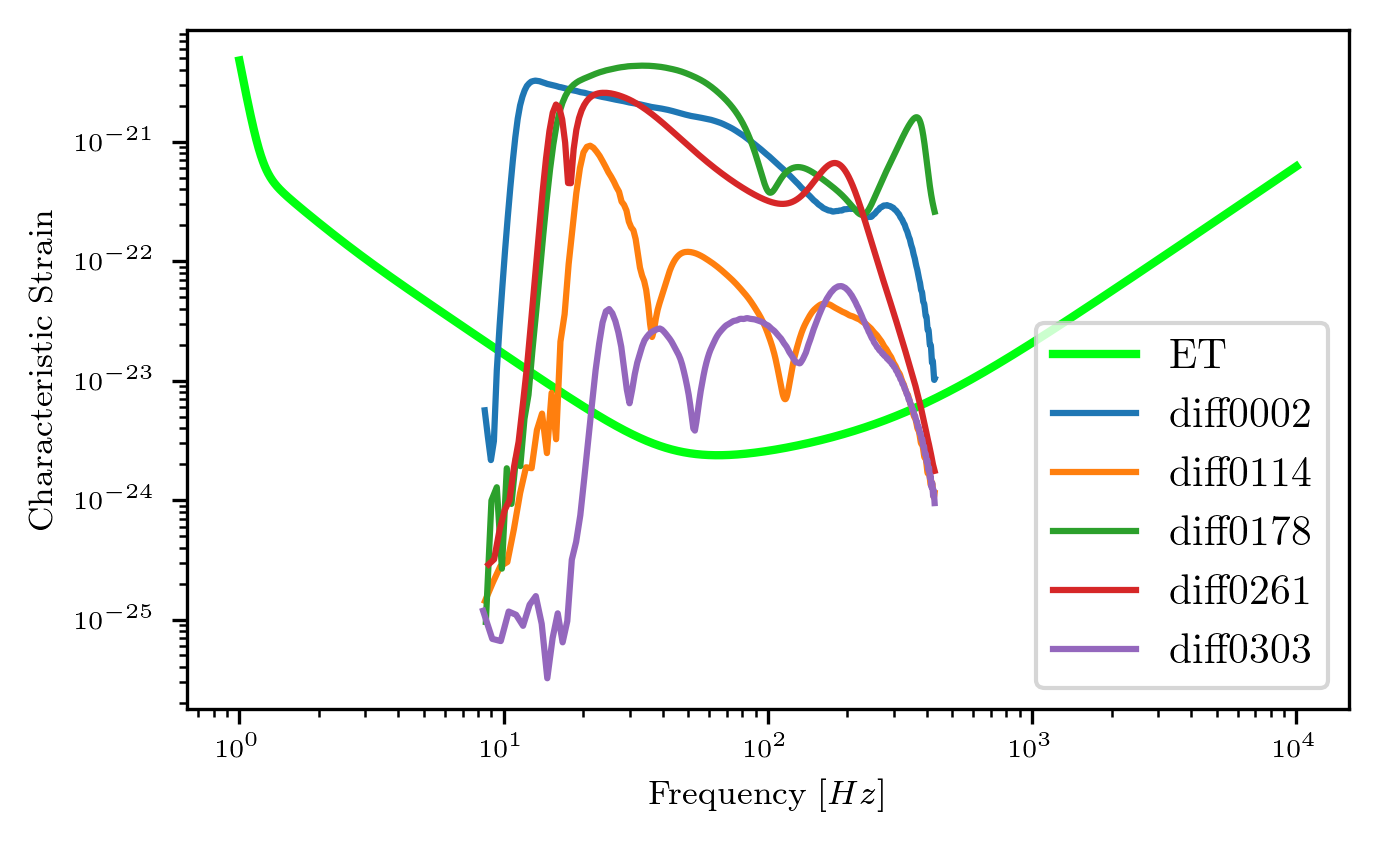

In [37]:
fig,ax = plt.subplots()
plt.loglog(ET.fT,ET.h_n_f, linewidth = linesize,color = cm.hsv(colornorm(1.75)),label = ET.name)
plt.loglog(diff0002.f,binary.Get_Char_Strain(diff0002),label = 'diff0002')
plt.loglog(diff0114.f,binary.Get_Char_Strain(diff0114),label = 'diff0114')
plt.loglog(diff0178.f,binary.Get_Char_Strain(diff0178),label = 'diff0178')
plt.loglog(diff0261.f,binary.Get_Char_Strain(diff0261),label = 'diff0261')
plt.loglog(diff0303.f,binary.Get_Char_Strain(diff0303),label = 'diff0303')
plt.xlabel(r'Frequency $[Hz]$',fontsize = labelsize)
plt.ylabel('Characteristic Strain',fontsize = labelsize)
plt.tick_params(axis = 'both',which = 'major', labelsize = axissize)
plt.legend(fontsize = legendsize)
plt.show()

## Plots of Entire GW Band

Displays only generated detectors: WN only PTAs, ESA L3 proposal LISA, aLIGO, and Einstein Telescope.

Displays three sources' waveform along with their monochromatic strain if they were observed by the initialized instrument at the detector's most sensitive frequency throughout its observing run (from left to right: `SKA_WN`,`LISA_prop1`,`ET`).

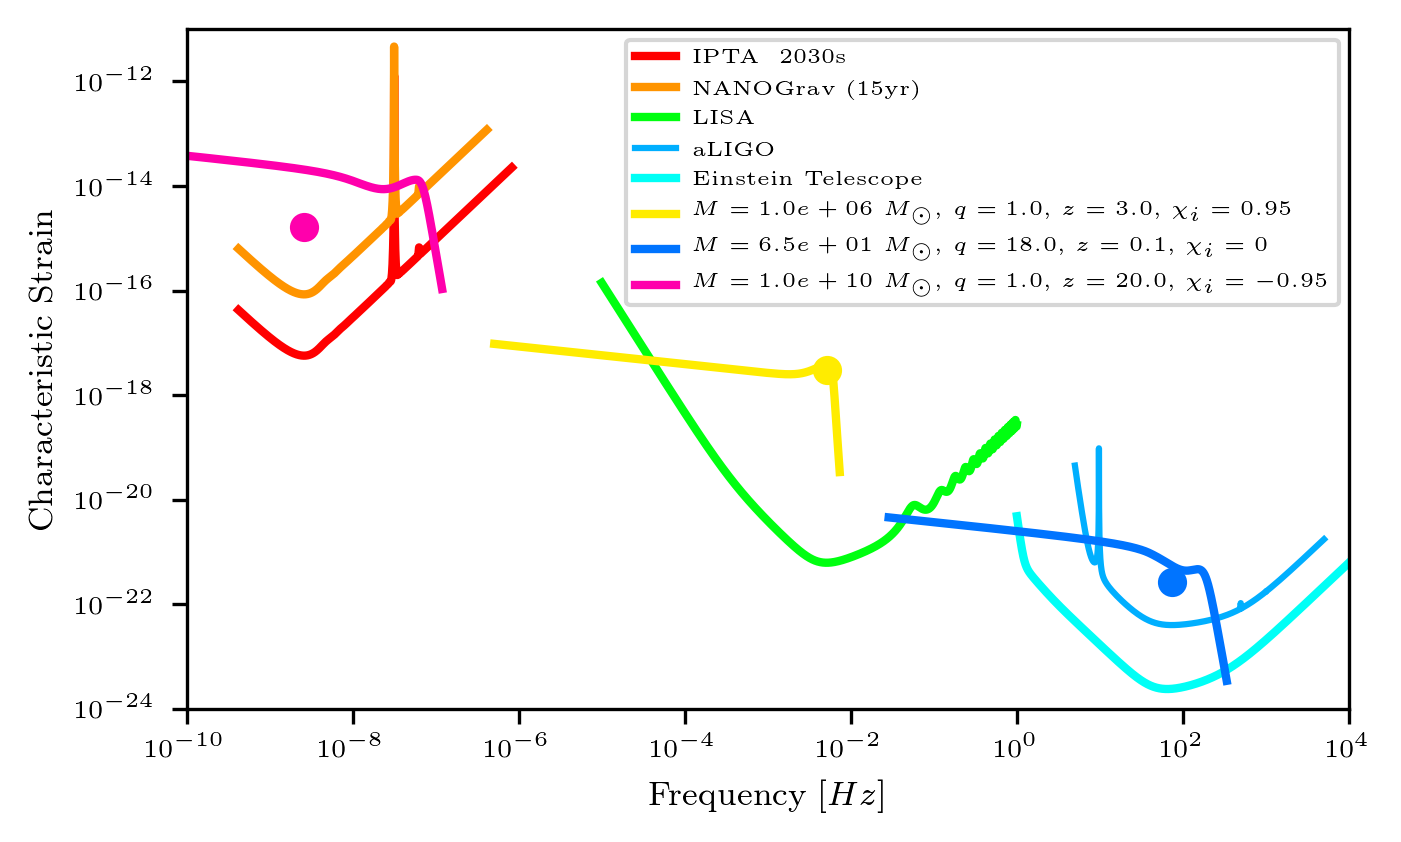

In [38]:
fig,ax = plt.subplots()

ax.loglog(SKA_WN.fT,SKA_WN.h_n_f, linewidth = linesize,color = cm.hsv(colornorm(0.0)),label = 'IPTA ~2030s')
ax.loglog(NANOGrav_WN.fT,NANOGrav_WN.h_n_f, linewidth = linesize,color = cm.hsv(colornorm(0.5)),\
          label = 'NANOGrav (15yr)')
ax.loglog(LISA_prop1.fT,LISA_prop1.h_n_f, linewidth = linesize,color = cm.hsv(colornorm(1.75)),label = 'LISA')
ax.loglog(aLIGO.fT,aLIGO.h_n_f,color = cm.hsv(colornorm(2.8)),label = 'aLIGO')
ax.loglog(ET.fT,ET.h_n_f, linewidth = linesize,color = cm.hsv(colornorm(2.5)),label = 'Einstein Telescope')

ax.loglog(source_1.f,binary.Get_Char_Strain(source_1), linewidth = linesize,color = cm.hsv(colornorm(0.8)),\
          label = r'$M = %.1e$ $M_{\odot}$, $q = %.1f$, $z = %.1f$, $\chi_{i} = %.2f$' %(M[0],q[0],z[0],x1[0]))
ax.scatter(source_1.instrument.f_opt,source_1.h_gw,color = cm.hsv(colornorm(0.8)))

ax.loglog(source_2.f,binary.Get_Char_Strain(source_2), linewidth = linesize,color = cm.hsv(colornorm(3.0)),\
          label = r'$M = %.1e$ $M_{\odot}$, $q = %.1f$, $z = %.1f$, $\chi_{i} = %.0f$' %(M[1],q[1],z[1],x1[1]))
ax.scatter(source_2.instrument.f_opt,source_2.h_gw,color = cm.hsv(colornorm(3.0)))

ax.loglog(source_3.f,binary.Get_Char_Strain(source_3), linewidth = linesize,color = cm.hsv(colornorm(4.5)),\
          label = r'$M = %.1e$ $M_{\odot}$, $q = %.1f$, $z = %.1f$, $\chi_{i} = %.2f$' %(M[2],q[2],z[2],x1[2]))
ax.scatter(source_3.instrument.f_opt,source_3.h_gw,color = cm.hsv(colornorm(4.5)))


ax.set_xlim([1e-10, 1e4])
ax.set_ylim([1e-24, 1e-11])
ax.tick_params(axis = 'both',which = 'major', labelsize = axissize)

ax.set_xlabel(r'Frequency $[Hz]$',fontsize = labelsize)
ax.set_ylabel('Characteristic Strain',fontsize = labelsize)
ax.legend(loc='upper right', fontsize = legendsize-5)
plt.show()